#  **NATALIO ANALYSIS** 

In [87]:
# Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import re

font_path = './data/Poppins-Regular.ttf'  # Replace with the path to your font file
poppins = fm.FontProperties(fname=font_path)

## Importing CSVs given by Meta

In [26]:
# Age & Gender
age_gender = pd.read_csv('./data/age_gender.csv',sep = ',')
age_gender

,Age,Women,Men
0,18-24,34.0,23.0
1,25-34,17.9,16.5
2,35-44,3.6,2.7
3,45-54,0.9,0.5
4,55-64,0.2,0.1
5,65+,0.3,0.3


In [58]:
# Reach
reach = pd.read_csv('./data/Reach.csv', sep = ',', encoding = 'utf-16')


def clean_reach(date):
    match = re.search(r'(\d{4})-(\d{2}-\d{2})', date)
    if match:
        return match.group(0) 
    return None


reach['Day'] = reach['Date'].apply(clean_reach)
reach.head()

,Date,Primary,Day
0,2024-07-18T00:00:00,362296,2024-07-18
1,2024-07-19T00:00:00,278830,2024-07-19
2,2024-07-20T00:00:00,339999,2024-07-20
3,2024-07-21T00:00:00,294862,2024-07-21
4,2024-07-22T00:00:00,253581,2024-07-22


In [67]:
# Top Countries
countries = pd.read_csv("./data/Top_countries.csv")

countries = countries.melt(var_name='country', value_name='prct_followers')
countries

,country,prct_followers
0,Mexico,39.2
1,Chile,12.0
2,Argentina,10.8
3,Colombia,8.7
4,Peru,6.7


In [71]:
# Top Cities
cities = pd.read_csv("./data/Top_cities.csv")

cities.rename(columns= {'Mexico City, Distrito Federal, Mexico': 'Mexico City',
                         'Santiago, Chile': 'Santiago',
                         'Lima, Peru': 'Lima',
                         'Bogotá, Distrito Especial, Colombia': 'Bogotá',
                         'Buenos Aires, Ciudad Autónoma de Buenos Aires, Argentina': 'Buenos Aires'}, inplace = True)

cities = cities.melt(var_name='city', value_name='prct_followers')
cities['country'] = ['Mexico', 'Chile', 'Peru', 'Colombia', 'Argentina']
cities = cities[['city', 'country', 'prct_followers']]

cities

,city,country,prct_followers
0,Mexico City,Mexico,8.1
1,Santiago,Chile,6.2
2,Lima,Peru,4.5
3,Bogotá,Colombia,3.0
4,Buenos Aires,Argentina,1.2


## Visualization

<Figure size 1200x600 with 0 Axes>

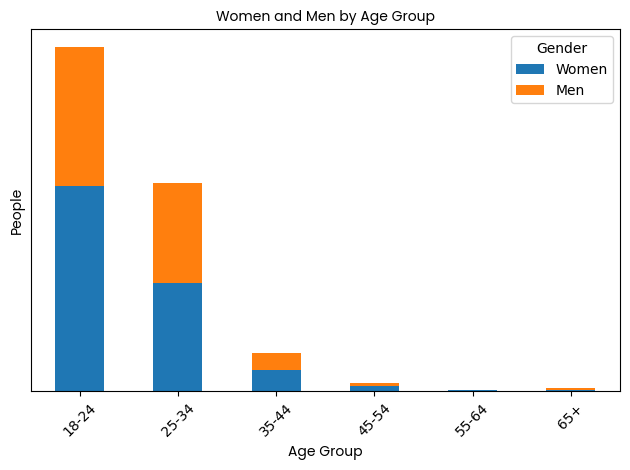

In [116]:
# Age & Gender
plt.figure(figsize=(12, 6))
age_gender.set_index('Age').plot(kind='bar', stacked=True)
plt.title('Women and Men by Age Group', fontproperties=poppins)
plt.xlabel('Age Group', fontproperties=poppins)
plt.ylabel('People', fontproperties=poppins)
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.yticks([])
plt.tight_layout() 
plt.show();

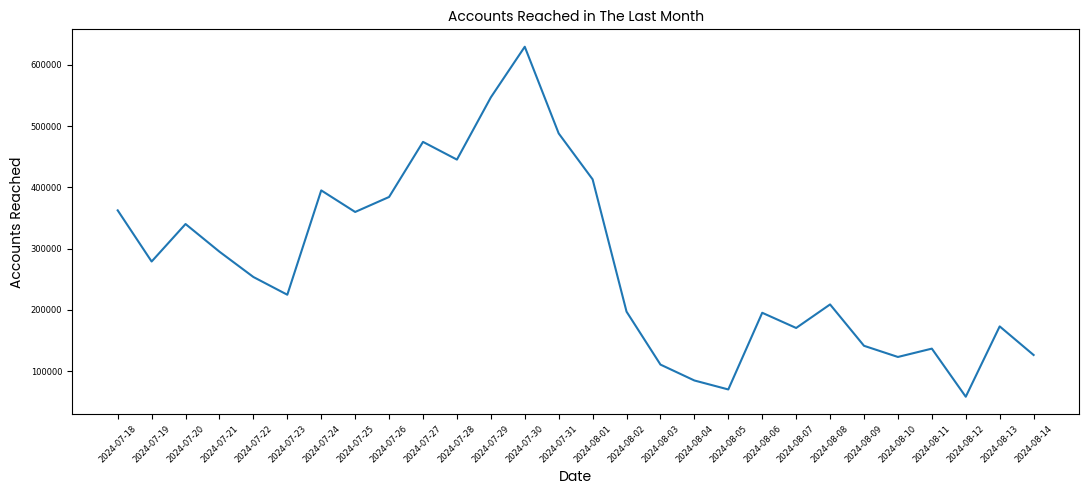

In [101]:
# Reach
plt.figure(figsize = (13,5))
sns.lineplot(data=reach, x='Day', y = 'Primary')
plt.xlabel("Date", fontsize = 10, fontproperties=poppins)
plt.xticks(fontsize= 6, rotation=45)
plt.ylabel("Accounts Reached", fontsize = 10, fontproperties=poppins),
plt.yticks(fontsize = 6)
plt.title("Accounts Reached in The Last Month", fontsize = 13, fontproperties=poppins);

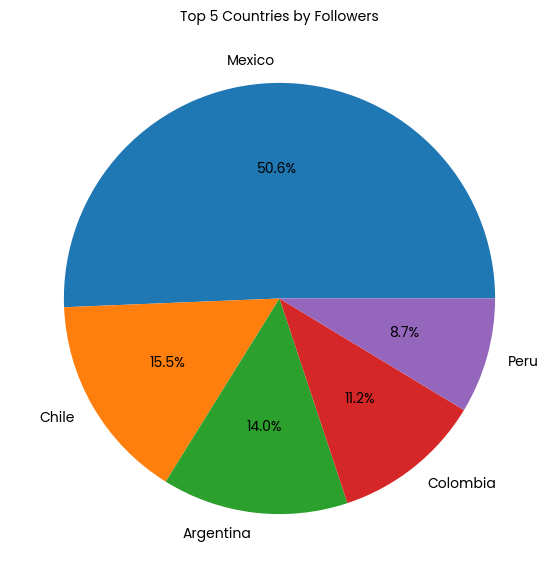

In [106]:
# Top Countries
plt.figure(figsize =(7,7))
prcts, labels, prct_txts = plt.pie(
    countries['prct_followers'],
    labels=countries['country'],
    autopct='%1.1f%%'
)

for label in labels:
    label.set_fontproperties(poppins)
for prct_txt in prct_txts:
    prct_txt.set_fontproperties(poppins)

plt.title("Top 5 Countries by Followers", fontsize =10, fontproperties=poppins);

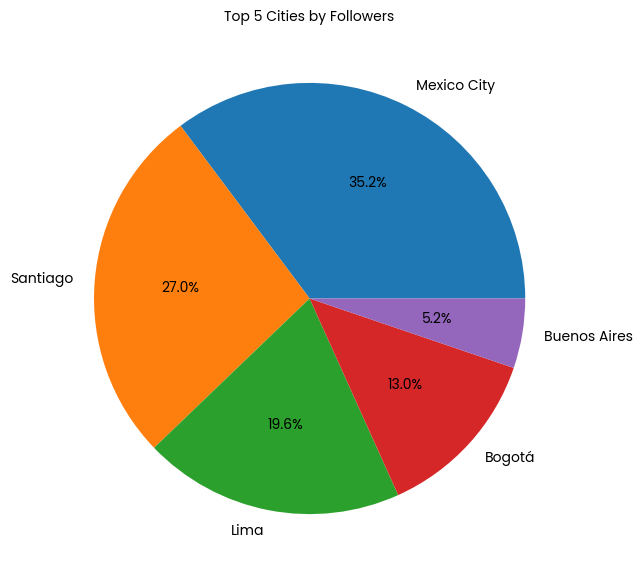

In [108]:
# Top Cities
plt.figure(figsize =(7,7))
prcts, labels, prct_txts = plt.pie(
    cities['prct_followers'],
    labels=cities['city'],
    autopct='%1.1f%%'
)

for label in labels:
    label.set_fontproperties(poppins)
for prct_txt in prct_txts:
    prct_txt.set_fontproperties(poppins)

plt.title("Top 5 Cities by Followers", fontsize =10, fontproperties=poppins);